In [1]:
import pandas as pd

data = pd.read_csv('kerala_traffic_accident_hotspot_dataset.csv')
print(data.head())


  Accident_ID  Latitude  Longitude        Date      Time Day_of_Week  \
0      A00001   11.5798    76.4935  2024-02-15  05:06:56      Sunday   
1      A00002   12.3070    75.0016  2024-04-11  00:37:00     Tuesday   
2      A00003    8.7993    77.0959  2024-03-12  06:47:02      Friday   
3      A00004    8.4378    76.5727  2024-02-11  05:15:34    Thursday   
4      A00005    9.3359    76.8484  2024-07-12  17:22:25     Tuesday   

   Traffic_Volume Road_Type  Speed_Limit Weather_Condition  Visibility  \
0             512     Urban           70              Rain        1998   
1            1615   Highway           70          Overcast         624   
2            1809   Highway           40             Clear        1746   
3            1146   Highway           40          Overcast         395   
4             202     Urban           30              Rain         183   

  Lighting_Condition  Proximity_to_Intersection  Accident_Severity  \
0           Daylight                        185     

In [3]:
features = ["Latitude", "Longitude", "Traffic_Volume", "Speed_Limit", "Visibility", "Accident_Severity","Weather_Condition","Lighting_Condition"]

data = data[features]

data

,Latitude,Longitude,Traffic_Volume,Speed_Limit,Visibility,Accident_Severity,Weather_Condition,Lighting_Condition
0,11.5798,76.4935,512,70,1998,3,Rain,Daylight
1,12.3070,75.0016,1615,70,624,2,Overcast,Daylight
2,8.7993,77.0959,1809,40,1746,2,Clear,Night
3,8.4378,76.5727,1146,40,395,1,Overcast,Daylight
4,9.3359,76.8484,202,30,183,1,Rain,Daylight
...,...,...,...,...,...,...,...,...
1995,11.1140,75.3983,1838,60,1386,2,Clear,Night
1996,8.6380,74.5471,1373,50,275,1,Overcast,Night
1997,8.1163,75.3485,1166,70,534,3,Overcast,Night
1998,11.5866,74.6243,1687,30,878,2,Overcast,Daylight


In [5]:
data.isnull().sum()

Latitude              0
Longitude             0
Traffic_Volume        0
Speed_Limit           0
Visibility            0
Accident_Severity     0
Weather_Condition     0
Lighting_Condition    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder_weather = LabelEncoder()
label_encoder_lighting = LabelEncoder()

data['Weather_Condition'] = label_encoder_weather.fit_transform(data['Weather_Condition'])
data['Lighting_Condition'] = label_encoder_lighting.fit_transform(data['Lighting_Condition'])


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Latitude', 'Longitude', 'Traffic_Volume', 'Speed_Limit', 'Visibility']
data[features] = scaler.fit_transform(data[features])


In [8]:
import pickle

with open('label_encoder_weather.pkl', 'wb') as file:
    pickle.dump(label_encoder_weather, file)

with open('label_encoder_lighting.pkl', 'wb') as file:
    pickle.dump(label_encoder_lighting, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data[features])

# Save the model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)


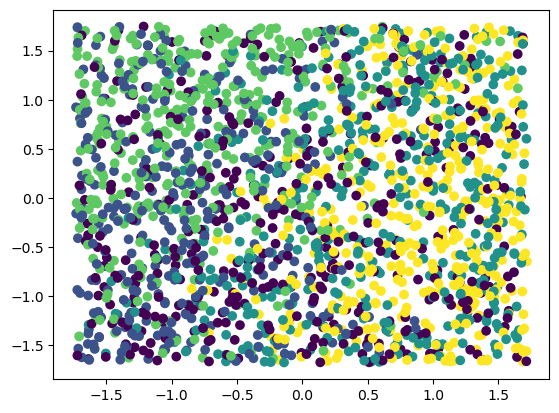

In [10]:
import matplotlib.pyplot as plt

data['Cluster'] = kmeans.labels_
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis')
plt.show()
